In [1]:
from tensorflow.keras.layers import Dense,Input,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2024-12-06 23:50:19.187239: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 23:50:19.253093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 23:50:19.290455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 23:50:19.300945: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 23:50:19.375928: I tensorflow/core/platform/cpu_feature_guar

In [3]:
import os

directory = r'/mnt/c/Users/91940/projects/dl/Deep Learning/Week3/RockPaperScissors/train'  # Corrected path
if not os.path.exists(directory):
    print("Directory does not exist:", directory)
else:
    print("Directory found. Proceeding...")


Directory found. Proceeding...


In [4]:
train_ds=image_dataset_from_directory(
    directory=r'/mnt/c/Users/91940/projects/dl/Deep Learning/Week3/RockPaperScissors/train',
    labels='inferred',
    label_mode='categorical',
    subset='training',
    color_mode='grayscale',
    batch_size=32,
    image_size=(256,256),
    seed=50,
    validation_split=0.2,
)

Found 2113 files belonging to 3 classes.
Using 1691 files for training.


I0000 00:00:1733509224.578160  166887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733509224.839846  166887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733509224.839918  166887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733509224.844249  166887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733509224.844320  166887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [5]:
validation_ds=image_dataset_from_directory(
    directory=r'/mnt/c/Users/91940/projects/dl/Deep Learning/Week3/RockPaperScissors/train',
    labels='inferred',
    label_mode='categorical',
    subset='validation',
    color_mode='grayscale',
    batch_size=32,
    image_size=(256,256),
    seed=50,
    validation_split=0.2,
)

Found 2113 files belonging to 3 classes.
Using 422 files for validation.


In [6]:
test_ds=image_dataset_from_directory(
    directory=r'/mnt/c/Users/91940/projects/dl/Deep Learning/Week3/RockPaperScissors/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    color_mode='grayscale',
    image_size=(256,256)
)

Found 75 files belonging to 3 classes.


## FCNN

In [7]:
fcnn = Sequential([
    Flatten(input_shape=(256,256)),
    keras.layers.Normalization(),
    Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(3,activation='softmax'),
    
])

/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
fcnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 65536)          │       131,073 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,951,876 (64.67 MB)

 Trainable params: 16,820,803 (64.17 MB)

 Non-trainable params: 131,073 (512.01 KB)

In [9]:
fcnn.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
his_fcnn=fcnn.fit(train_ds,validation_data=validation_ds,epochs=50)

Epoch 1/50


I0000 00:00:1733509228.611778  167032 service.cc:146] XLA service 0x7fe8e400aee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733509228.611908  167032 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-12-06 23:50:28.641320: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-06 23:50:28.787454: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


16/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3207 - loss: 1750.8978

I0000 00:00:1733509230.487638  167032 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.3431 - loss: 1550.5048 - val_accuracy: 0.3128 - val_loss: 187.7927
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3526 - loss: 244.8359 - val_accuracy: 0.3626 - val_loss: 40.9479
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3515 - loss: 48.0025 - val_accuracy: 0.4502 - val_loss: 1.5866
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3731 - loss: 13.4845 - val_accuracy: 0.3223 - val_loss: 1.1008
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3242 - loss: 1.1001 - val_accuracy: 0.3223 - val_loss: 1.1008
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3234 - loss: 1.1002 - val_accuracy: 0.3223 - val_loss: 1.1009
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3198 - loss: 1.0981 - val_accuracy: 0.3128 - val_loss: 1.1008
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3578 - loss: 1.0979 - val_accuracy: 0.3128 - v

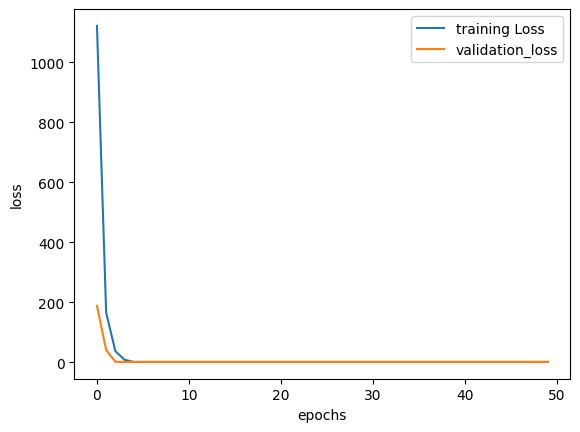

In [11]:
plt.plot(his_fcnn.history['loss'],label='training Loss')
plt.plot(his_fcnn.history['val_loss'],label='validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
fcnn.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - accuracy: 0.3424 - loss: 1.0986


[1.099194884300232, 0.3333333432674408]

In [13]:
y_pred_fc=fcnn.predict(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step


In [14]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [15]:
y_pred_fc=np.argmax(y_pred_fc,axis=1)

In [16]:

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_true = np.argmax(y_true, axis=1)


2024-12-06 23:51:25.011537: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
cr=classification_report(y_true,y_pred_fc)

/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [18]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        25
           2       0.33      1.00      0.50        25

    accuracy                           0.33        75
   macro avg       0.11      0.33      0.17        75
weighted avg       0.11      0.33      0.17        75



In [19]:
cm=confusion_matrix(y_true,y_pred_fc)

<Axes: >

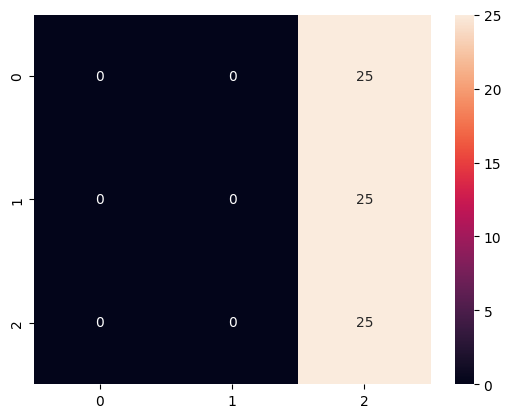

In [20]:
sns.heatmap(cm,annot=True)

In [21]:
fcnn2= Sequential([
    Flatten(),
    keras.layers.Rescaling(1./255),
    Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(3,activation='softmax')
    
])

In [22]:
fcnn2.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
his_fcnn2=fcnn2.fit(train_ds,validation_data=validation_ds,epochs=50)

Epoch 1/50


2024-12-06 23:51:26.721711: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_217', 4 bytes spill stores, 4 bytes spill loads

2024-12-06 23:51:27.200736: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1175', 32 bytes spill stores, 32 bytes spill loads

2024-12-06 23:51:27.262476: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_217', 144 bytes spill stores, 144 bytes spill loads

2024-12-06 23:51:27.546914: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1175', 32 bytes spill stores, 32 bytes spill loads

2024-12-06 23:51:27.647305: I external/local_xla/xla/stream_ex

52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3491 - loss: 6.4023

2024-12-06 23:51:30.328818: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_217', 4 bytes spill stores, 4 bytes spill loads

2024-12-06 23:51:30.914019: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_217', 176 bytes spill stores, 176 bytes spill loads

2024-12-06 23:51:31.096667: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1175', 32 bytes spill stores, 32 bytes spill loads

2024-12-06 23:51:31.147273: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1175', 24 bytes spill stores, 24 bytes spill loads

2024-12-06 23:51:31.296641: I external/local_xla/xla/stream_ex

53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.3488 - loss: 6.3276 - val_accuracy: 0.3626 - val_loss: 1.1718
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3473 - loss: 1.4171 - val_accuracy: 0.3365 - val_loss: 1.0609
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3822 - loss: 1.1281 - val_accuracy: 0.3246 - val_loss: 1.0956
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3289 - loss: 1.1053 - val_accuracy: 0.3128 - val_loss: 1.0990
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3583 - loss: 1.0982 - val_accuracy: 0.3128 - val_loss: 1.0993
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3572 - loss: 1.0983 - val_accuracy: 0.3128 - val_loss: 1.0995
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3616 - loss: 1.0979 - val_accuracy: 0.3128 - val_loss: 1.0999
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3698 - loss: 1.0970 - val_accuracy: 0.3128 - val_loss: 

## Using 1 convolutional layer

In [24]:
cnn1= Sequential(
    [Input(shape=(256,256,1),name='Input_layer'),
     keras.layers.Normalization(),
     keras.layers.Conv2D(32,activation='relu',kernel_size=(5,5),strides=(1,1)),
     keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
     Flatten(),
     Dense(100,activation='relu',name='Hidden_layer'),
     keras.layers.Dropout(0.2),
     Dense(3,activation='softmax',name='output_layer')
    ]
)

In [25]:
cnn1.summary()
cnn1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 256, 256, 1)    │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 252, 252, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 508032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer (Dense)            │ (None, 100)            │    50,803,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,804,438 (193.80 MB)

 Trainable params: 50,804,435 (193.80 MB)

 Non-trainable params: 3 (16.00 B)

In [26]:
his_cnn1=cnn1.fit(train_ds,batch_size=32,epochs=50,validation_data=validation_ds)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.3260 - loss: 1880.9666 - val_accuracy: 0.3246 - val_loss: 1.0988
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3198 - loss: 1.0988 - val_accuracy: 0.3246 - val_loss: 1.0989
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3154 - loss: 1.0987 - val_accuracy: 0.3128 - val_loss: 1.0990
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3541 - loss: 1.1545 - val_accuracy: 0.3128 - val_loss: 1.0992
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3561 - loss: 1.0982 - val_accuracy: 0.3128 - val_loss: 1.0993
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3700 - loss: 1.0978 - val_accuracy: 0.3128 - val_loss: 1.0994
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3672 - loss: 1.0977 - val_accuracy: 0.3128 - val_loss: 1.0996
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3653 - loss: 1.0976 - val_accuracy: 0.3128 

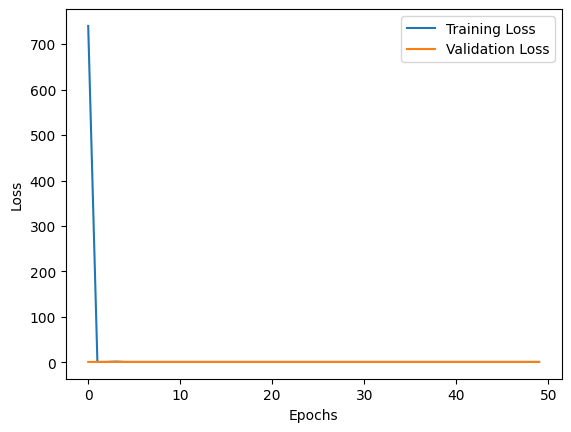

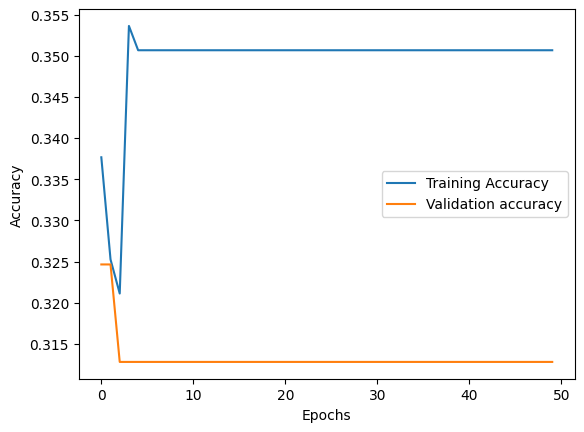

In [27]:
plt.plot(his_cnn1.history['loss'],label='Training Loss')
plt.plot(his_cnn1.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(his_cnn1.history['accuracy'],label='Training Accuracy')
plt.plot(his_cnn1.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



In [28]:
cnn1.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step - accuracy: 0.3346 - loss: 1.0991


[1.0992544889450073, 0.3333333432674408]

In [29]:
y_pred_cnn=cnn1.predict(test_ds)
y_pred_cnn1=np.argmax(y_pred_cnn,axis=1)
cr=classification_report(y_true,y_pred_cnn1)
print(cr)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        25
           2       0.33      1.00      0.50        25

    accuracy                           0.33        75
   macro avg       0.11      0.33      0.17        75
weighted avg       0.11      0.33      0.17        75



/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

<Axes: >

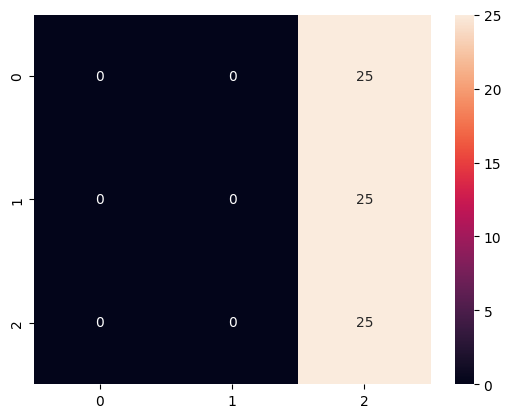

In [30]:
cm4=confusion_matrix(y_true,y_pred_cnn1)
sns.heatmap(cm4,annot=True,fmt='d')

## Using 2 Layers of Convolution layers

In [31]:
cnn2= Sequential(
    [Input(shape=(256,256,1),name='Input_layer'),
     keras.layers.Normalization(),
     keras.layers.Conv2D(32,activation='relu',kernel_size=(3,3),strides=(1,1)),
     keras.layers.Conv2D(32,activation='relu',kernel_size=(3,3),strides=(1,1)),
     keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
     Flatten(),
     Dense(100,activation='relu',name='Hidden_layer'),
     keras.layers.Dropout(0.2),
     Dense(3,activation='softmax',name='output_layer')
    ]
)

In [32]:
cnn2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 256, 256, 1)    │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 508032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer (Dense)            │ (None, 100)            │    50,803,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,813,174 (193.84 MB)

 Trainable params: 50,813,171 (193.84 MB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
his_cnn2=cnn2.fit(train_ds,epochs=50,validation_data=validation_ds)

Epoch 1/50
